In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #4
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #5
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #6
  (fname, cnt))


In [2]:
cap = cv2.VideoCapture(1)

In [3]:
ret = cap.set(3,960); # width
ret = cap.set(4,540); # height

In [4]:
ret, frame = cap.read()

In [5]:
background = cv2.imread("/Users/ethanweber/Documents/github_personal/smARtable/app/background/main_camera.png")

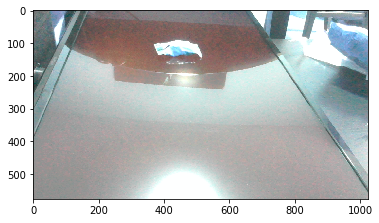

In [6]:
plt.imshow(frame)

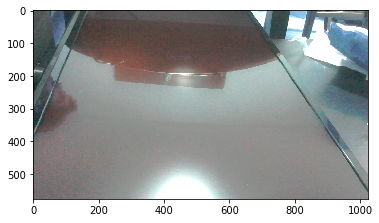

In [7]:
plt.imshow(background)

In [8]:
difference = np.absolute(np.subtract(frame, background))

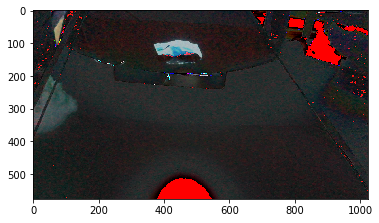

In [9]:
plt.imshow(difference, cmap='gray')

In [40]:
# filter the image
kernel = np.ones((25,25),np.uint8)
filtered = cv2.erode(difference,kernel,iterations=1)
filtered = cv2.dilate(filtered,kernel,iterations=1)

# convert to grayscale
filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

In [41]:
# set as 0 for this range
filtered = np.where(np.logical_and(0<=filtered, filtered<=50), 0, filtered)

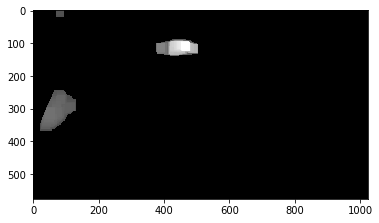

In [42]:
plt.imshow(filtered, cmap='gray')

In [47]:
im2, contours, hierarchy = cv2.findContours(filtered,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

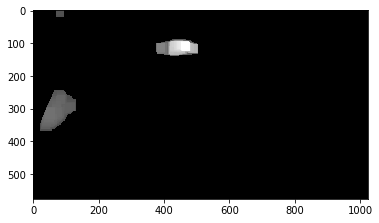

In [54]:
plt.imshow(im2, cmap='gray')

In [59]:
# final_image = cv2.cvtColor(im2, cv2.COLOR_GRAY2BGR)

In [60]:
for contour in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    

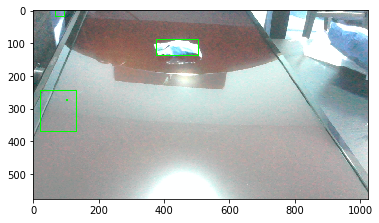

In [61]:
plt.imshow(frame)